In [1]:
import dimspy
import os

In [2]:
data_directory = "/home/keo7/Data/dimspy-example/"

spectrum_list = []

for index, file in enumerate(os.listdir(data_directory)):
    spectrum = dimspy.Spectrum(os.path.join(data_directory, file), polarity="positive", injection_order=index)
    spectrum_list.append(spectrum)

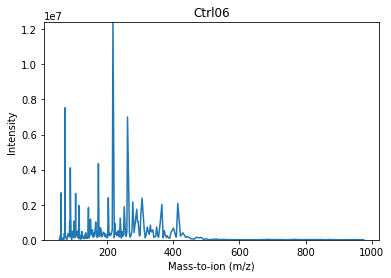

In [3]:
for spectrum in spectrum_list:
    spectrum.plot()
    break

In [4]:
spec_list = dimspy.SpectrumList(spectrum_list)

In [5]:
print spec_list

In [6]:
processor = dimspy.SpectrumListProcessor(spec_list)

dimspy/SpectrumListProcessor.py:51: UserWarning:

Outlier detection removed: 



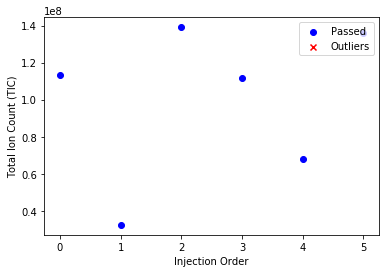

In [7]:
processor.outlier_detection(plot=True)

In [8]:
for spectrum in processor.spectrum_list.to_list():
    print spectrum.id

Ctrl06
Ctrl04
Ctrl01
Ctrl03
Ctrl05
Ctrl02
